# **Validación de modelos con Cross-Validation**

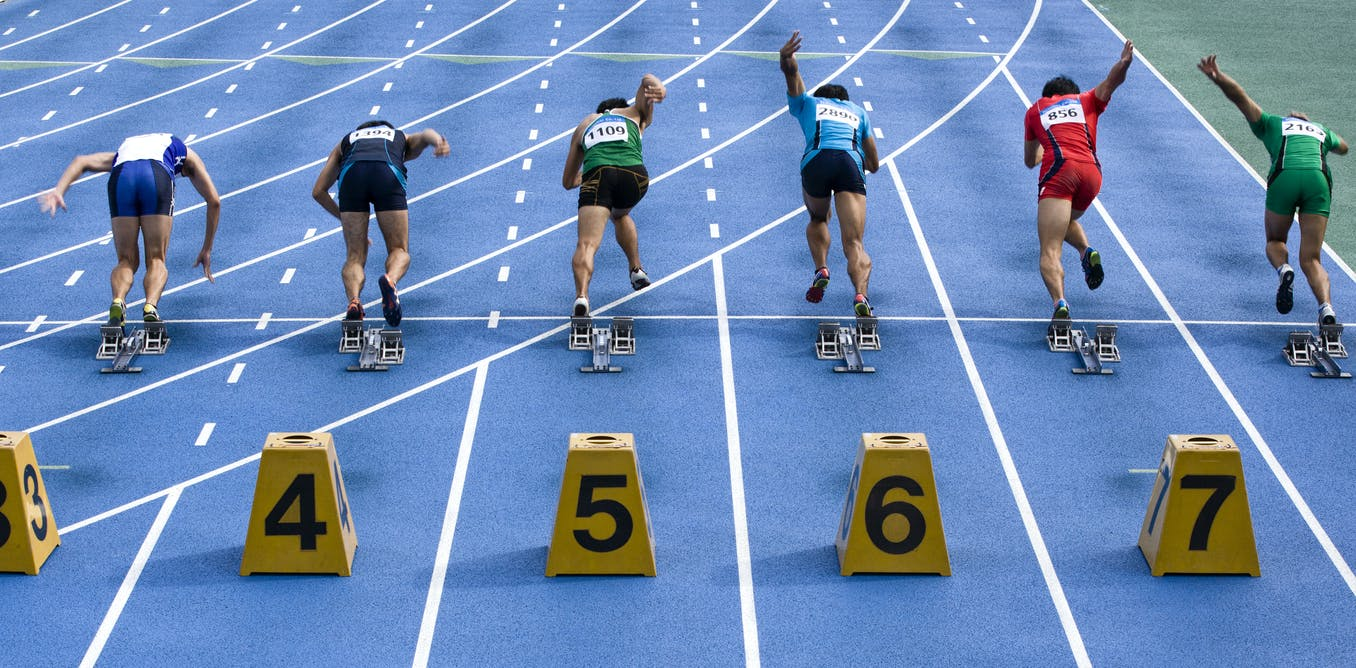

### **Estabilidad de los modelos**

Cuando pensamos en un algoritmo de aprendizaje automático, la primer métrica que nos viene a la mente es su precisión. Gran parte de la investigación se centra en desarrollar algoritmos que sean precisos y puedan predecir el resultado con un alto grado de confianza. Durante el proceso de entrenamiento, un tema importante en el que pensar es la estabilidad del algoritmo de aprendizaje. Esto nos permite comprender cómo resultará un modelo en particular. Necesitamos asegurarnos de que se generalice bien a varios conjuntos de entrenamiento. Estimar la estabilidad se vuelve crucial en estas situaciones.


La métrica de precisión nos dice cuántas muestras se clasificaron correctamente, pero no nos dice nada sobre cómo el conjunto de datos de entrenamiento influyó en este proceso. Si elegimos un subconjunto diferente de datos de entrenamiento, el modelo seguirá siendo el mismo ? Si repetimos este experimento con diferentes subconjuntos del mismo tamaño, el modelo realizará su trabajo con la misma eficiencia ? Idealmente, queremos que el modelo siga siendo el mismo y realice su trabajo con la misma precisión. Aquí es donde entra en escena el análisis de estabilidad.


La estabilidad de un algoritmo de aprendizaje se refiere a los cambios en la salida del modelo cuando cambiamos el conjunto de datos de entrenamiento. Se dice que un algoritmo de aprendizaje es estable si el modelo aprendido no cambia demasiado cuando se modifica el conjunto de datos de entrenamiento.
Esto significa que el modelo ha sido bien entrenado para generalizar y encontrar patrones en nuestros datos.


### **Causas de inestabilidad**

Cualquier modelo de aprendizaje automático necesita predecir consistentemente la salida correcta a partir de diferentes valores de entrada, presentes en diferentes conjuntos de datos. Sin embargo, los modelos pueden perder su estabilidad, lo cual se explica por dos motivos:

1. *Underfitting*: Ocurre cuando el modelo no se ajusta correctamente a los datos de entrenamiento. No encuentra patrones en los datos y por lo tanto, cuando se le brindan nuevos datos para predecir, tampoco puede encontrar patrones en ellos. Tiene un rendimiento inferior tanto en datos conocidos como en los no vistos.

2. *Overfitting*: cuando el modelo se entrena bien con datos de entrenamiento y se generaliza, pero no funciona con datos nuevos, desconocidos. Captura cada pequeña variación en los datos de entrenamiento y no puede funcionar con datos que no tengan las mismas variaciones.

Las siguientes imágenes muestran un ejemplo de cada tipo de modelo:


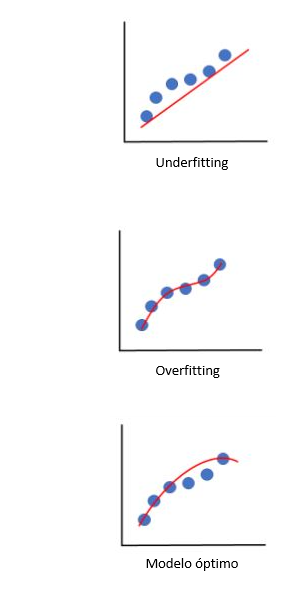

En la primer figura, podemos ver que el modelo no captura todas las características de los datos y omite algunos puntos importantes. Este modelo ha generalizado demasiado nuestros datos y está mal ajustado. En la siguiente figura, nuestro modelo ha capturado todos los aspectos de los datos, incluido el ruido. Si le diéramos un dataset diferente, no podría predecirlo, ya que es demasiado específico para nuestros datos de entrenamiento, por lo que está sobreajustado (overfitting) . En la última imagen, el modelo captura las complejidades de nuestro modelo mientras ignora el ruido, este modelo es un modelo óptimo.

### **La validación cruzada**

A menudo los datos son limitados, nuestro dataset puede no tener suficientes ejemplos o incluso puede tener datos incorrectos o faltantes. Además, si tenemos menos datos, se terminan utilizando la misma porción de los mismos para el entrenamiento y las pruebas del modelo, lo cual no brindan una visión precisa de cómo funciona nuestro modelo. Entrenar un modelo con los mismos datos significa que el modelo eventualmente aprenderá bien solo para esos datos y fallará en los datos nuevos, es decir sufrirá de sobreajuste. Aquí es donde entra en juego la validación cruzada.

La validación cruzada es una técnica para evaluar modelos cuando los datos disponiboes son relativamente escasos. Los modelos se entrenan usando un subconjunto del dataset y luego se evalúa la performance usando el subconjunto complementario de dicho subconjunto. Esto significa que en lugar de dividir nuestro conjunto de datos en dos partes, una para entrenar y otra para testear, dividimos el dataset en múltiples porciones, entrenamos en algunas de estas y usamos el resto para probar.

El procedimiento tiene un solo parámetro llamado k que se refiere al número de grupos en los que se dividirá una muestra de datos determinada. Por este motivo El procedimiento a menudo se denomina k-fold cross validation. Cuando se elige un valor específico para k, por ejemplo k = 10, el proceso se repite 10 veces, esto significa que cada subconjunto se utiliza nueve veces como para entrenamiento y una vez para testing. 

El procedimiento general es el siguiente:

1.	Mezclar el conjunto de datos de forma aleatoria.
2.	Dividir el conjunto de datos en k grupos
3.	Para cada uno de los k grupos:
    1.   Asignarlo como conjunto de datos de prueba o de reserva (hold-out)
    2.   Asignar los grupos restantes como el conjunto de datos de entrenamiento
    3.   Entrenar un modelo con el conjunto de entrenamiento y evalualo con el
         conjunto de prueba.
    4.   Conserve la puntuación de la evaluación y descarte el modelo.

4.  Para obtener la precisión final del modelo, se toma el promedio de todas las medidas

Veamos una representación gráfica del procedimiento para un k = 4:         
      


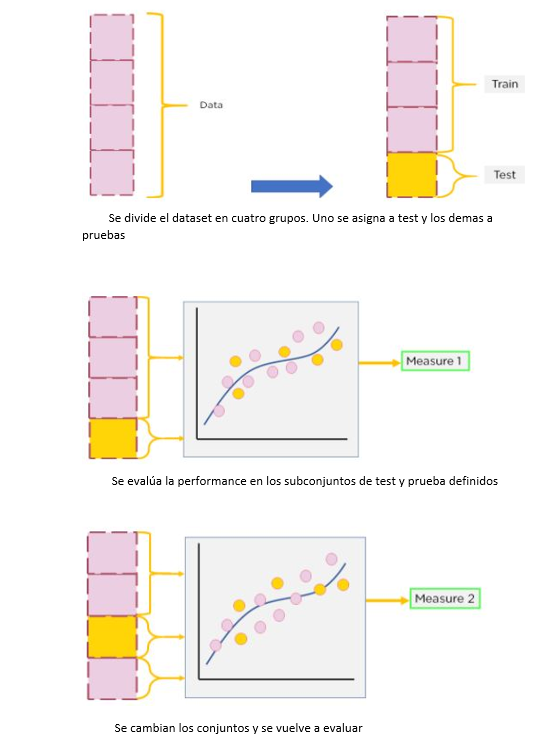
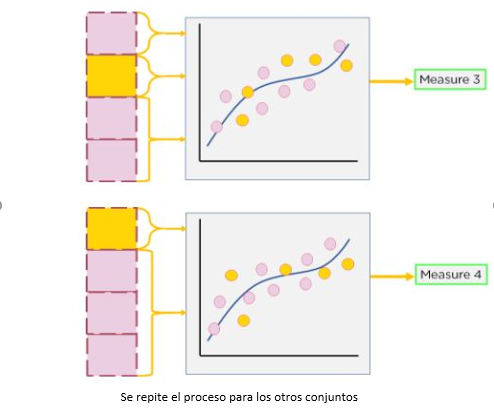

### **Implementación**


Afortunadamente no es necesario calcular manualmente los pasos del algoritmo de cross-validation.
Herramientas como Rapidminer o Scikit Learn proveen los métodos necesarios para hacer validaciones cruzadas con diferentes parámetros de ejecución.

En el caso de Rapidminer, el operador Cross Validation recibe la información del dataset, se le configuran parámetros como el k, el tipo de muestreo etc y automáticamente hace todos los muestreos y calculos necesarios. Finalmente con un operador Performance obtenemos la precision del modelo.

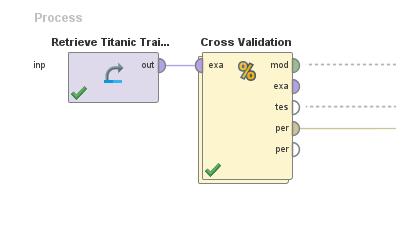
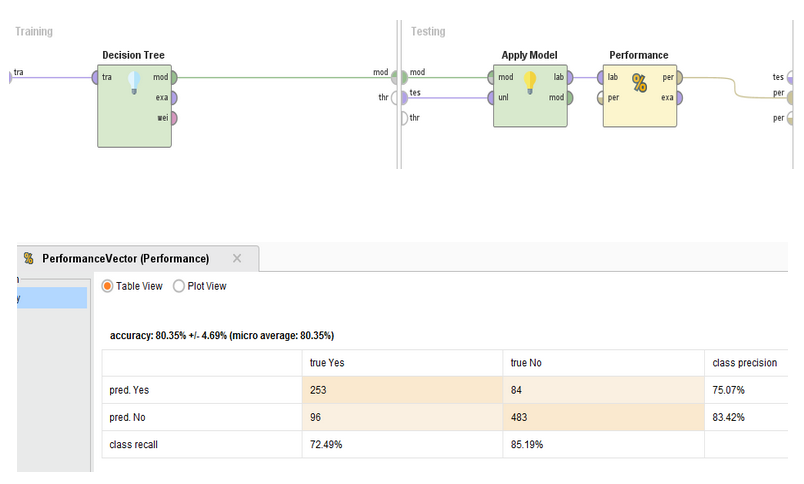

En Python, la clase KFold() de la librería scikit-learn toma como argumentos el número de divisiones, si se mezcla o no la muestra, y la semilla para el generador de números pseudoaleatorios usado antes de la mezcla.
Por ejemplo, podemos crear una instancia que divida un conjunto de datos en 5 grupos, lo mezcle antes de la división y use un valor de 1 para el generador de números pseudoaleatorios.
Luego se puede llamar a la función split() en forma iterativa y devolverá cada grupo de entrenamiento y de prueba. Específicamente, se devuelven matrices que contienen los índices en la muestra de datos original de observaciones para usar para entrenar y probar conjuntos en cada iteración.
Podemos ver como funciona implementando cross-validation con un pequeño dataset de 10 elementos y 5 iteraciones 


In [ ]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
data = array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
i=1
for train, test in kfold.split(data):
  print('k= %s, train: %s, test: %s' % (i, data[train], data[test]))
  i=i+1;
  

k= 1, train: [0 1 3 4 5 6 7 8], test: [2 9]
k= 2, train: [0 1 2 3 5 7 8 9], test: [4 6]
k= 3, train: [1 2 4 5 6 7 8 9], test: [0 3]
k= 4, train: [0 2 3 4 5 6 8 9], test: [1 7]
k= 5, train: [0 1 2 3 4 6 7 9], test: [5 8]


### **Variantes de Cross-Validation**

Existen alguna variantes al procedimiento clásico de validacion cruzada:

* **LOOCV**: llevado a otro extremo, k puede establecerse en el número total de observaciones en el conjunto de datos de modo que cada observación tenga la oportunidad de quedar fuera del conjunto de datos. Esto se llama Leave One Out Cross-Validation (validación cruzada dejando uno fuera)

* **Estratificado**: la división de datos en grupos puede regirse por criterios como asegurar que cada grupo tenga la misma proporción de observaciones con un valor categórico dado, como el valor del resultado de la clase de prediccion. Esto se llama validación cruzada estratificada.

* **Repetido**: aquí es donde el procedimiento de validación cruzada de k veces se repite n veces, donde lo más importante es que la muestra de datos se baraja antes de cada repetición, lo que da como resultado una división diferente de la muestra.

* **Anidado**: aquí es donde se realiza la validación cruzada de k veces dentro de cada grupo de la validación. Se usa sobretodo para realizar el ajuste de parámetros durante la evaluación del modelo. Esto se denomina validación cruzada anidada o validación cruzada doble.
